<a href="https://colab.research.google.com/github/3B032049/2025_ML_hws/blob/main/hw5-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. 讀入深度學習套件

In [35]:
import urllib.request
import os
import tarfile

In [36]:
url="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
filepath="data/aclImdb_v1.tar.gz"
if not os.path.isfile(filepath):
    result=urllib.request.urlretrieve(url,filepath)
    print('downloaded:',result)

In [37]:
if not os.path.exists("data/aclImdb"):
    tfile = tarfile.open("data/aclImdb_v1.tar.gz", 'r:gz')
    result=tfile.extractall('data/')

### 2. 讀入數據

一般自然語言處理, 我們會限制最大要使用的字數。

In [38]:
# from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer

In [39]:
import re
def rm_tags(text):
    re_tag = re.compile(r'<[^>]+>')
    return re_tag.sub('', text)


In [40]:

import os
def read_files(filetype):
    path = "data/aclImdb/"
    file_list=[]

    positive_path=path + filetype+"/pos/"
    for f in os.listdir(positive_path):
        file_list+=[positive_path+f]

    negative_path=path + filetype+"/neg/"
    for f in os.listdir(negative_path):
        file_list+=[negative_path+f]

    print('read',filetype, 'files:',len(file_list))

    all_labels = ([1] * 12500 + [0] * 12500)

    all_texts  = []
    for fi in file_list:
        with open(fi,encoding='utf8') as file_input:
            all_texts += [rm_tags(" ".join(file_input.readlines()))]

    return all_labels,all_texts


In [41]:
y_train,train_text=read_files("train")
y_test,test_text=read_files("test")

read train files: 25000
read test files: 25000


# . 建立 tokenizer

In [42]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(train_text)

In [43]:
x_train_seq = tokenizer.texts_to_sequences(train_text)
x_test_seq = tokenizer.texts_to_sequences(test_text)

In [44]:
print(train_text[0])

Yes, the cameras were in the right place at the right time. It's so interesting to see how a world leader (like Chavez) who supports the poor people in his country, can be held in such low esteem in the US. His worst "sin", in my opinion, is caring about those who are at the bottom of the barrel. What can be so bad about that? I have always been fascinated by the US government+media reaction to Fidel Castro. At first, Castro was a good guy (around 1959) when he supplanted Batista. Soon, however, Castro started turning the corporations in Cuba toward the needs of the poor instead of the fat cats. We're a decent country, but why does our media and government have such a problem with sharing with the poor? If these guys are "dictators," then we could use more "dictatorships" especially where the poorest of the poor live in the world.


In [45]:
x_train = sequence.pad_sequences(x_train_seq, maxlen=100)
x_test  = sequence.pad_sequences(x_test_seq,  maxlen=100)

In [46]:
print('before pad_sequences length=',len(x_train_seq[0]))
print(x_train_seq[0])

before pad_sequences length= 131
[418, 1, 67, 7, 1, 204, 269, 29, 1, 204, 54, 41, 34, 217, 5, 63, 85, 3, 178, 36, 33, 1, 334, 80, 7, 23, 700, 66, 25, 1424, 7, 137, 360, 7, 1, 174, 23, 245, 7, 57, 648, 6, 40, 144, 33, 22, 29, 1, 1327, 4, 1, 47, 66, 25, 34, 75, 40, 11, 9, 24, 206, 73, 30, 1, 174, 1360, 1772, 5, 29, 82, 12, 3, 48, 229, 183, 50, 26, 511, 186, 641, 1582, 1, 7, 1837, 1, 734, 4, 1, 334, 300, 4, 1, 1916, 1101, 3, 538, 700, 17, 134, 123, 259, 1772, 2, 1360, 24, 137, 3, 435, 15, 15, 1, 334, 44, 130, 489, 22, 91, 71, 96, 357, 49, 257, 117, 1, 4, 1, 334, 408, 7, 1, 178]


In [47]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25000, 100)
(25000, 100)
(25000,)
(25000,)


### 4. step 01: 打造一個函數學習機

In [48]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb




In [49]:
model = Sequential()
model.add(Embedding(input_dim=2000, output_dim=32, input_length=100))
# Embedding層參數個數 = 輸入大小*輸出大小= 2000*32= 64000

model.add(LSTM(128))
# LSTM層參數個數 = 4*(((輸入大小+輸出大小)*輸出大小)+輸出大小)= 4*(((32+128)*128)+128)= 82432

model.add(Dense(1, activation='sigmoid'))
# Dense層參數個數 = (輸入*輸出)+輸出= (128*1)+1= 129

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [50]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#### 欣賞我們的 model

In [51]:
model.build(input_shape=(None, 100))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 32)        │        64,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │        82,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 146,561 (572.50 KB)

 Trainable params: 146,561 (572.50 KB)

 Non-trainable params: 0 (0.00 B)

### 5. step 02: 訓練

In [52]:
train_history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 106s 165ms/step - accuracy: 0.7111 - loss: 0.5508 - val_accuracy: 0.6256 - val_loss: 0.7399
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 135s 155ms/step - accuracy: 0.8576 - loss: 0.3475 - val_accuracy: 0.7842 - val_loss: 0.4495
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 155ms/step - accuracy: 0.8725 - loss: 0.3049 - val_accuracy: 0.8408 - val_loss: 0.4195
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 159ms/step - accuracy: 0.8856 - loss: 0.2774 - val_accuracy: 0.8098 - val_loss: 0.4574
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 146s 166ms/step - accuracy: 0.9023 - loss: 0.2479 - val_accuracy: 0.8138 - val_loss: 0.4546
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 137s 158ms/step - accuracy: 0.9101 - loss: 0.2265 - val_accuracy: 0.7872 - val_loss: 0.5924
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 136s 148ms/step - accuracy: 0.9193 - loss: 0.2118 - val_accuracy: 0.8568 - val_loss: 0.3828
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 150ms/step - accuracy: 0.9273 -

In [56]:
# 畫出訓練過程每一個epoch訓練資料與驗證資料各自準確率(accuracy)的變化，或者損失誤差(loss)的變化
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()


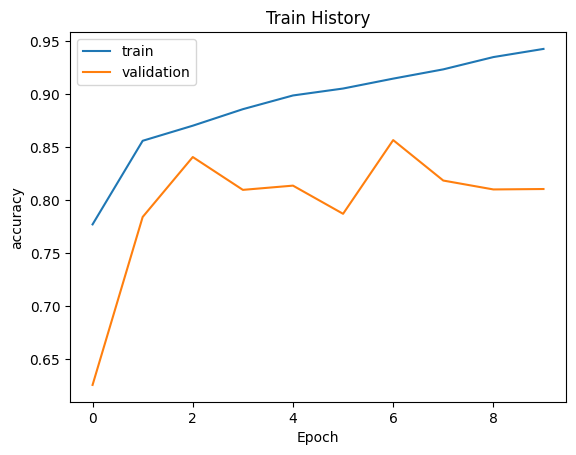

In [58]:
# 準確率accuracy
show_train_history(train_history,'accuracy','val_accuracy')


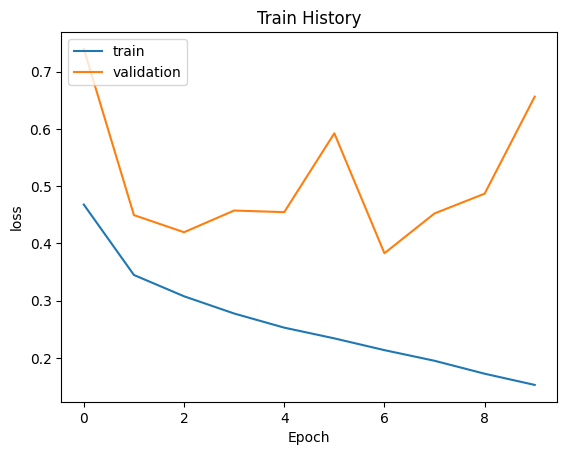

In [59]:
# 損失誤差loss
show_train_history(train_history,'loss','val_loss')

In [60]:
scores = model.evaluate(x_test, y_test)
print()
print('accuracy=',scores[1])

782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.8498 - loss: 0.4492

accuracy= 0.834879994392395


### 6. 換個存檔方式

這次是把 model 和訓練權重分開存, 使用上更有彈性。

In [61]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [63]:
model_json = model.to_json()
open('imdb_model_architecture.json', 'w').write(model_json)
model.save_weights('imdb_model.weights.h5')

In [64]:
import pickle
f = open('SaveModel/imdb_tokenizer_2000.pkl', 'wb')
pickle.dump(tokenizer, f)
f.close()